In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
ds = load_iris()

In [4]:
dir(ds)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
ds.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = ds.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower_name'] = df.target.apply(lambda x: ds.target_names[x])
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [11]:
from matplotlib import pyplot as plt

In [12]:
%matplotlib inline

In [13]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [14]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


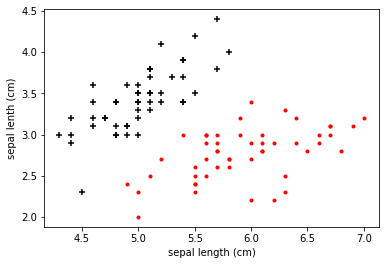

In [27]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal lenth (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='black',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')

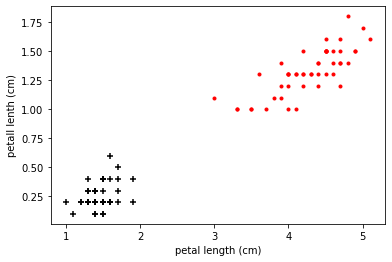

In [28]:
plt.xlabel('petal length (cm)')
plt.ylabel('petall lenth (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='black',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='.')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(['target','flower_name'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y= df.target

In [35]:
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.3)

In [36]:
len(x_train)

105

In [37]:
len(x_test)

45

In [38]:
from sklearn.svm import SVC
model = SVC()

In [39]:
model.fit(x_train,y_train)

SVC()

In [40]:
pred=model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,pred)

0.9777777777777777

In [43]:
import pickle as pkl
pickle_out=open("model1.pickle","wb")
pkl.dump(model,pickle_out)
pickle_out.close()